In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn

In [375]:
df = pd.read_csv("./unprepared_df.csv")

df.head()

,Unnamed: 0,Year,Sale Date,Sale Price,Property Location,Year Built,Garden,Garage,Type,Style,Bedrooms,Bathrooms,First Time Buyer
0,0,2021,Sold 2021-01-10,"€381,302.00",Broomhouse,1967,Yes,Yes,Detached,1.5-Storey,3,1,No
1,1,2021,Sold 2021-01-10,"€325,898.00",Broomhouse,1978,Yes,???,Detached,1-Storey,3,1,Yes
2,2,2021,Sold 18 January 2021,"€ 370,354",Oak Park,1961,Yes,No,Detached,1-Storey,3,2,No
3,3,2021,Sold 2021-01-23,"€92,480.00",Beacon Hill,1958,Yes,No,Bungalow,1-Storey,1,1,Yes
4,4,2021,Sold 2021-01-25,"€312,030.00",Brookville,1987,Yes,Yes,Detached,1-Storey,3,1,No


In [376]:
df['Sale Date'] = df['Sale Date'].str.slice(start=4, stop=None)
df['Sale Date'] = pd.to_datetime(df['Sale Date'], format="mixed")

df['Sale Price'] = df['Sale Price'].str.slice(start=1, stop=None)
df['Sale Price'] = df['Sale Price'].str.replace(',','')

df['Year Built'] = df['Year Built'].str.replace('c','')
df['Year Built'] = df['Year Built'].str.replace('Unknown', '0')

df['Style'] = df['Style'].str.replace('-Storey', '')


In [377]:
print(set(df['Garage']))
print(set(df['Garden']))
print(set(df['First Time Buyer']))
print(set(df['Type']))
print(set(df['Property Location']))
print(set(df['Style']))

{'???', 'No', 'Yes'}
{'???', 'No', 'Yes'}
{'NO', 'No', 'Yes', 'YES'}
{'Semi-D', 'Bungalow', 'Duplex', 'Semi-Detached', 'Detached', 'Terraced', 'Det.', 'End-of-Terrace'}
{'Porter Square', 'Brookville', 'Avoca', 'Summerston', 'Oak Park', 'Broomhouse', 'Rivermount', 'Beacon Hill'}
{'1.5', '2', '1'}


In [378]:
df['Sale Price'] = df['Sale Price'].astype('float')
df['Property Location'] = df['Property Location'].astype('category')
df['Year Built'] = df['Year Built'].astype('int')
df['Garden'] = df['Garden'].map({"Yes": "True", "No": "False", "???": "NA"})
df['Garden'] = df['Garden'].astype('category')
df['Garage'] = df['Garage'].map({"Yes": "True", "No": "False", "???": "NA"})
df['Garage'] = df['Garage'].astype('category')
df['Type'] = df['Type'].replace({"Semi-D": 'Semi-Detached', "Det.": "Detached"})
df['Type'] = df['Type'].astype('category')
df['Style'] = df['Style'].astype('category')
df['Bedrooms'] = df['Bedrooms'].astype('int')
df['Bathrooms'] = df['Bathrooms'].astype('int')
df['First Time Buyer'] = df['First Time Buyer'].str.lower().map({'yes': True, 'no': False})
df['First Time Buyer'] = df['First Time Buyer'].astype('bool')

In [379]:
df = df.drop(columns=["Unnamed: 0", "Year"])

df.head()

,Sale Date,Sale Price,Property Location,Year Built,Garden,Garage,Type,Style,Bedrooms,Bathrooms,First Time Buyer
0,2021-01-10,381302.0,Broomhouse,1967,True,True,Detached,1.5,3,1,False
1,2021-01-10,325898.0,Broomhouse,1978,True,NA,Detached,1,3,1,True
2,2021-01-18,370354.0,Oak Park,1961,True,False,Detached,1,3,2,False
3,2021-01-23,92480.0,Beacon Hill,1958,True,False,Bungalow,1,1,1,True
4,2021-01-25,312030.0,Brookville,1987,True,True,Detached,1,3,1,False


In [380]:
df.dtypes

Sale Date            datetime64[ns]
Sale Price                  float64
Property Location          category
Year Built                    int64
Garden                     category
Garage                     category
Type                       category
Style                      category
Bedrooms                      int64
Bathrooms                     int64
First Time Buyer               bool
dtype: object

In [381]:
df.to_csv('./prepared_df.csv')

In [382]:
# Set style
plt.style.use('ggplot')
sns.set_palette('Set2')
sns.set_context("talk")

In [383]:
# Display basic information
print("\n===== DATASET OVERVIEW =====")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)


===== DATASET OVERVIEW =====
Dataset shape: (1400, 11)

First 5 rows:
   Sale Date  Sale Price Property Location  Year Built Garden Garage  \
0 2021-01-10    381302.0        Broomhouse        1967   True   True   
1 2021-01-10    325898.0        Broomhouse        1978   True     NA   
2 2021-01-18    370354.0          Oak Park        1961   True  False   
3 2021-01-23     92480.0       Beacon Hill        1958   True  False   
4 2021-01-25    312030.0        Brookville        1987   True   True   

       Type Style  Bedrooms  Bathrooms  First Time Buyer  
0  Detached   1.5         3          1             False  
1  Detached     1         3          1              True  
2  Detached     1         3          2             False  
3  Bungalow     1         1          1              True  
4  Detached     1         3          1             False  

Data types:
Sale Date            datetime64[ns]
Sale Price                  float64
Property Location          category
Year Built           

In [384]:
# Basic statistics
print("\n===== NUMERICAL STATISTICS =====")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numeric_cols].describe().T)


===== NUMERICAL STATISTICS =====
             count           mean            std      min       25%       50%  \
Sale Price  1400.0  431799.372857  176855.956643  92480.0  320024.0  384528.5   
Year Built  1400.0    1900.198571     389.281324      0.0    1956.0    1976.0   
Bedrooms    1400.0       2.889286       0.746610      1.0       2.0       3.0   
Bathrooms   1400.0       1.541429       0.559279      1.0       1.0       2.0   

                  75%        max  
Sale Price  503139.75  1660289.0  
Year Built    2011.00     2021.0  
Bedrooms         3.00        5.0  
Bathrooms        2.00        3.0  


Text(0.5, 1.0, 'Distribution of Sale Prices')

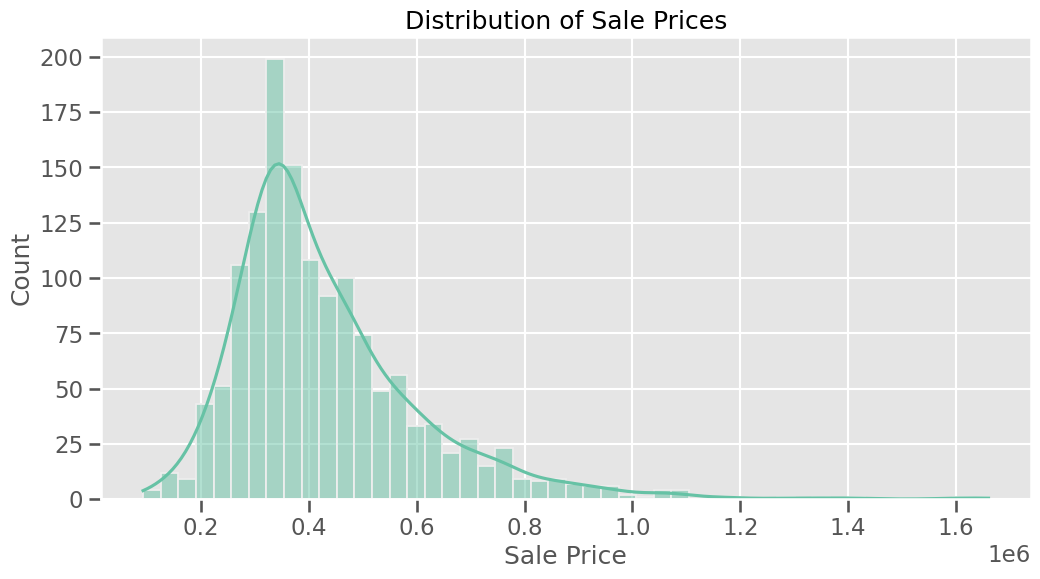

In [385]:
# Distribution of sale prices
plt.figure(figsize=(12, 6))
sns.histplot(df['Sale Price'], kde=True)
plt.title('Distribution of Sale Prices')

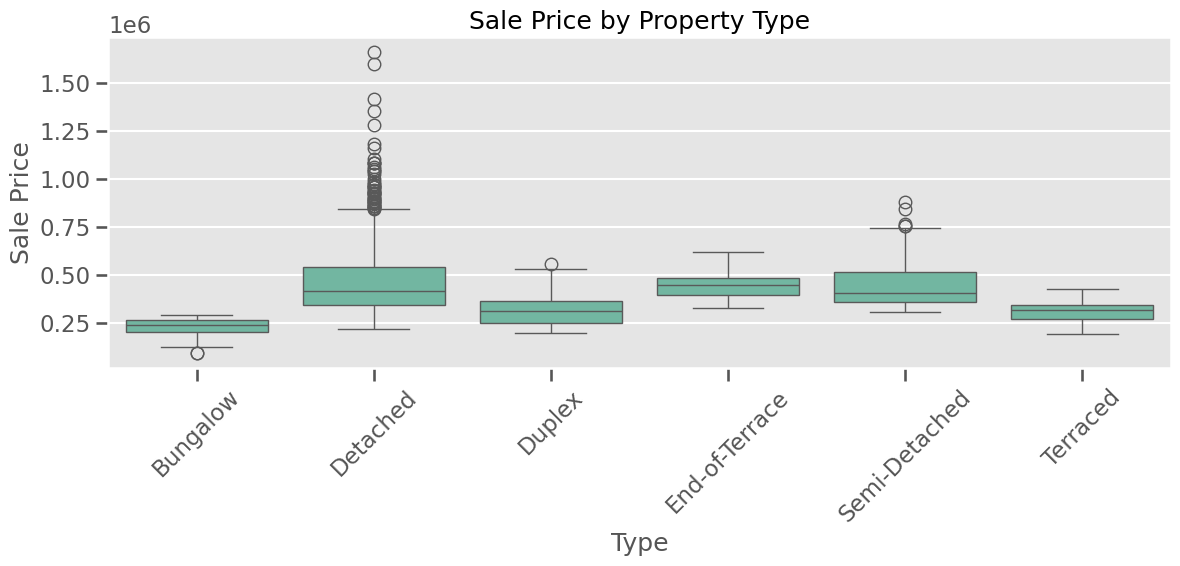

In [386]:
# Price by property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Sale Price', data=df)
plt.title('Sale Price by Property Type')
plt.xticks(rotation=45)
plt.tight_layout()

/tmp/ipykernel_33410/3486105198.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Sale Date')['Sale Price'].resample('M').mean().plot()


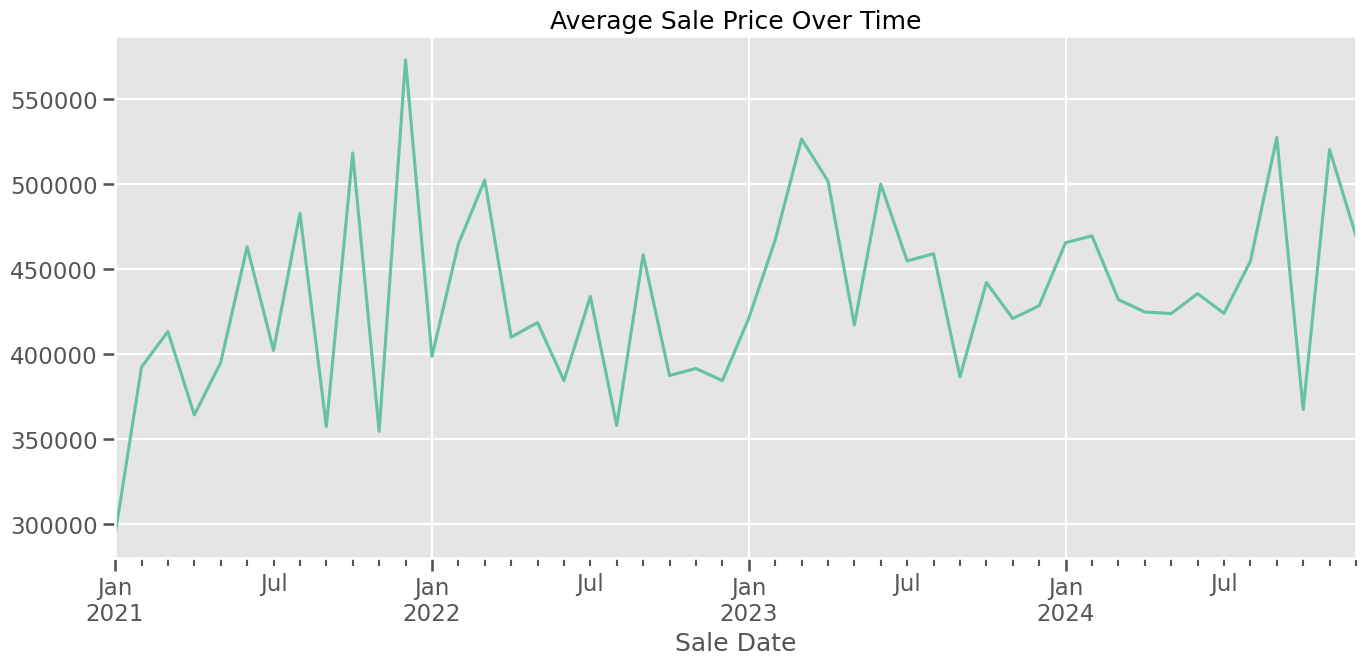

In [387]:
# Price over time
plt.figure(figsize=(14, 7))
df.set_index('Sale Date')['Sale Price'].resample('M').mean().plot()
plt.title('Average Sale Price Over Time')
plt.tight_layout()



===== CORRELATION ANALYSIS =====
Correlation with Sale Price:
Sale Price           1.000000
Bathrooms            0.535449
Property Location    0.386180
Style                0.271575
Bedrooms             0.235981
Sale Date            0.041519
Year Built           0.020651
First Time Buyer    -0.083061
Garage              -0.112129
Garden              -0.114237
Type                -0.144128
Name: Sale Price, dtype: float64


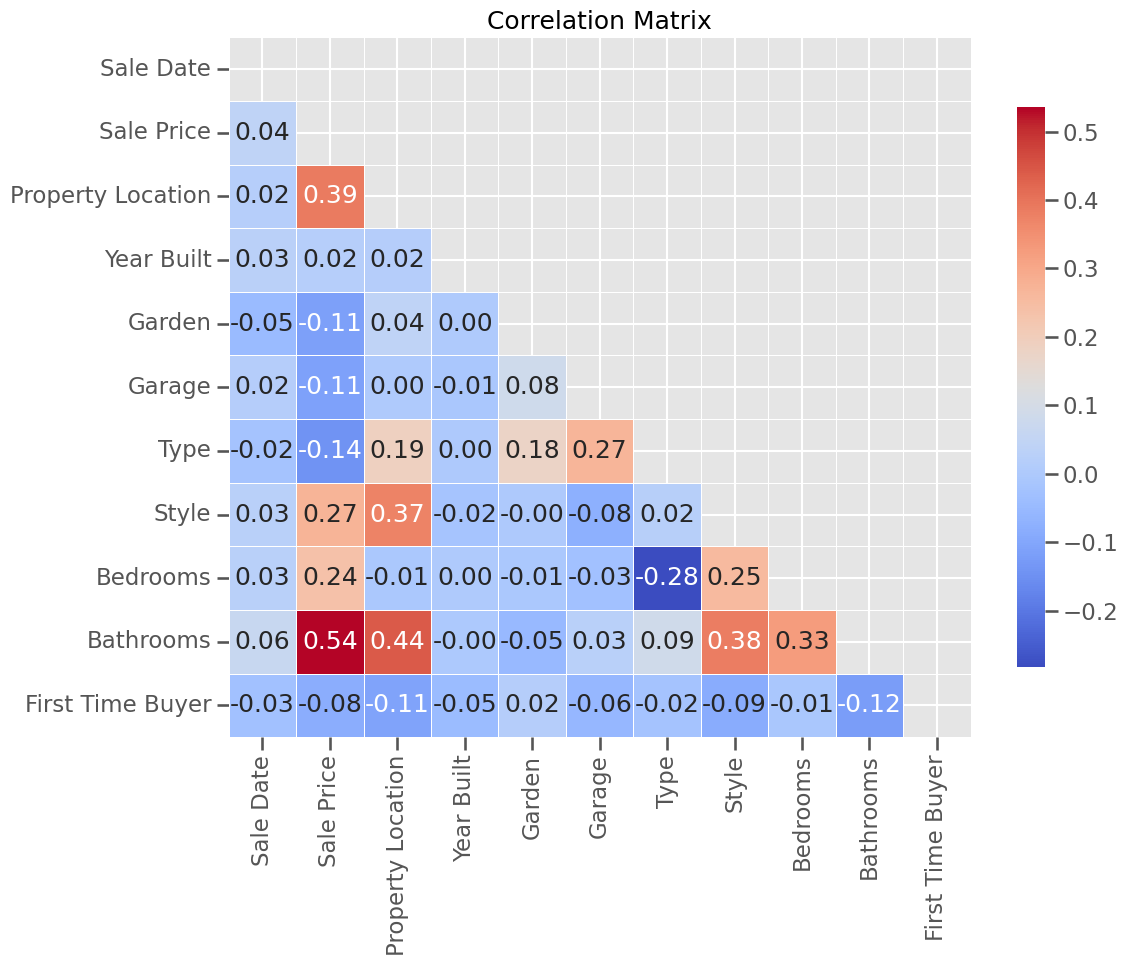

In [388]:

# Correlation analysis
print("\n===== CORRELATION ANALYSIS =====")
# Convert categorical variables to numeric for correlation
df_corr = df.copy()
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns
for col in categorical_cols:
    if col in df_corr.columns:
        df_corr[col] = pd.factorize(df_corr[col])[0]

# Calculate correlation matrix
corr_matrix = df_corr.corr()
print("Correlation with Sale Price:")
print(corr_matrix['Sale Price'].sort_values(ascending=False))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.tight_layout()


===== PROPERTY CHARACTERISTICS =====


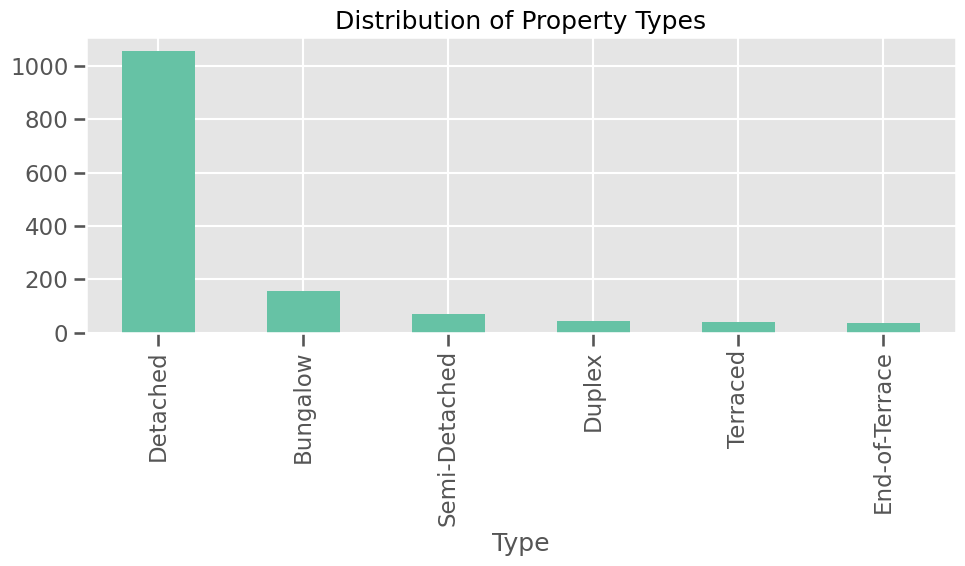

In [389]:
# Property characteristics analysis
print("\n===== PROPERTY CHARACTERISTICS =====")
# Distribution of property types
plt.figure(figsize=(10, 6))
df['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Property Types')
plt.tight_layout()

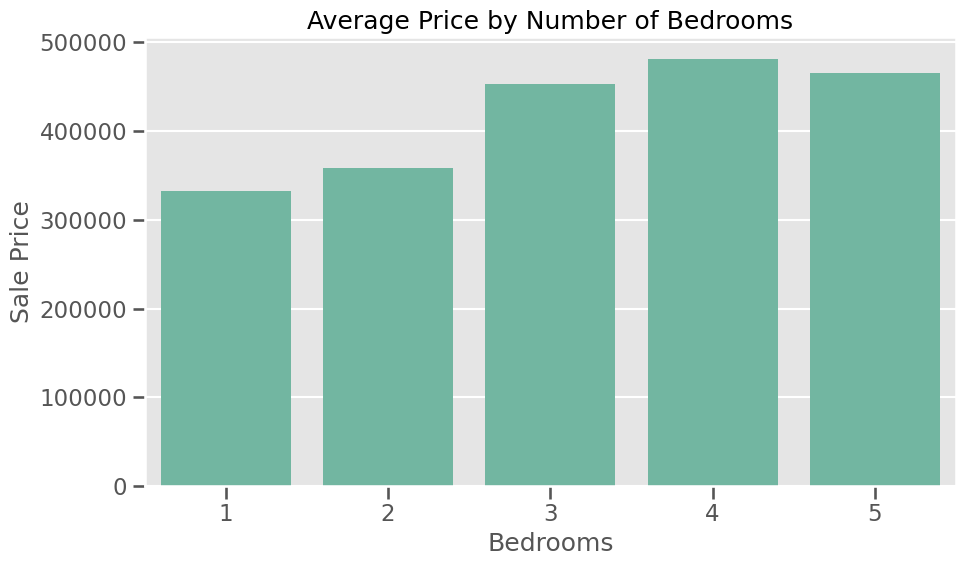

In [390]:
# Average price by number of bedrooms
plt.figure(figsize=(10, 6))
bedroom_price = df.groupby('Bedrooms')['Sale Price'].mean().reset_index()
sns.barplot(x='Bedrooms', y='Sale Price', data=bedroom_price)
plt.title('Average Price by Number of Bedrooms')
plt.tight_layout()


===== FEATURE IMPACT ANALYSIS =====


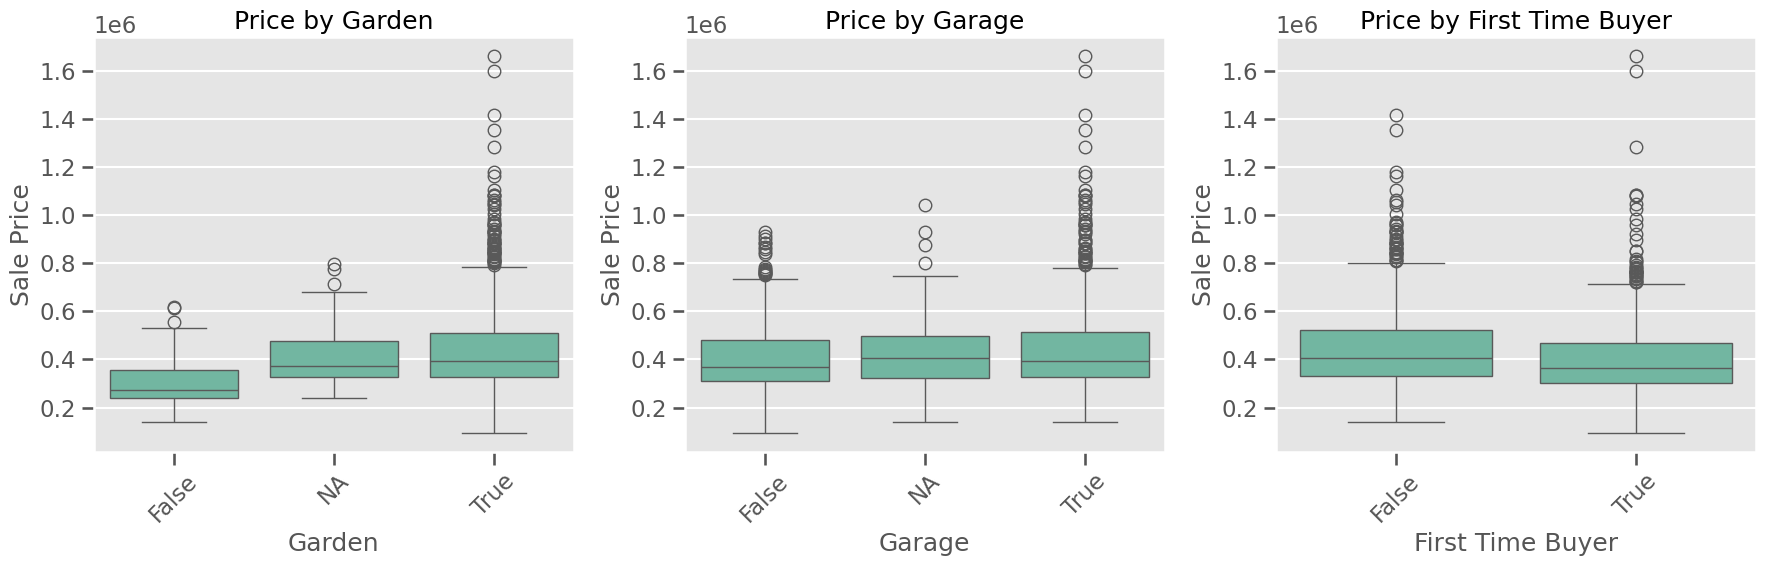

In [391]:
# Impact of garden and garage on price
print("\n===== FEATURE IMPACT ANALYSIS =====")
features = ['Garden', 'Garage', 'First Time Buyer']
fig, axes = plt.subplots(1, len(features), figsize=(18, 6))

for i, feature in enumerate(features):
    if feature in df.columns:
        sns.boxplot(x=feature, y='Sale Price', data=df, ax=axes[i])
        axes[i].set_title(f'Price by {feature}')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

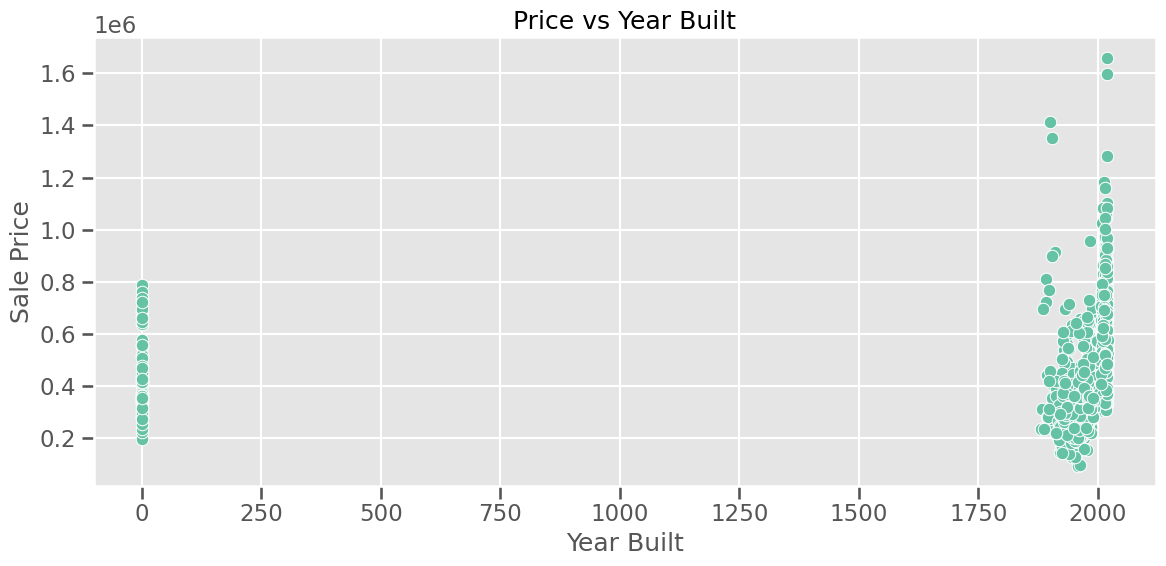

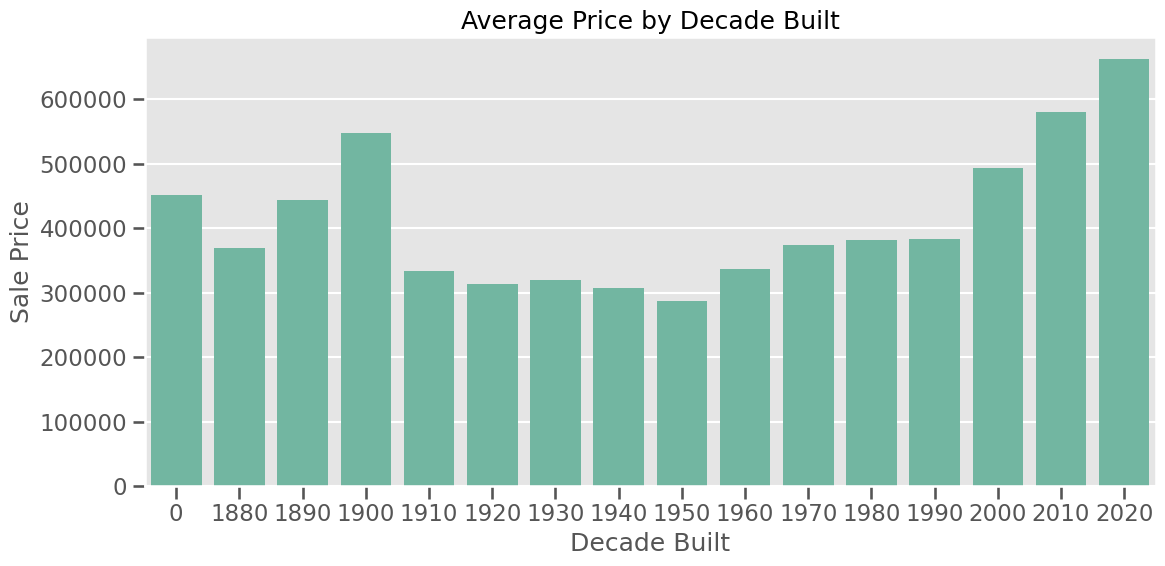

In [392]:
# Year built analysis
if 'Year Built' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Year Built', y='Sale Price', data=df)
    plt.title('Price vs Year Built')
    plt.tight_layout()
    
    # Decade analysis
    df['Decade Built'] = (df['Year Built'] // 10) * 10
    plt.figure(figsize=(12, 6))
    decade_price = df.groupby('Decade Built')['Sale Price'].mean().reset_index()
    sns.barplot(x='Decade Built', y='Sale Price', data=decade_price)
    plt.title('Average Price by Decade Built')
    plt.tight_layout()

/tmp/ipykernel_33410/2068932109.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_price = df.groupby('Property Location')['Sale Price'].mean().sort_values(ascending=False).reset_index()


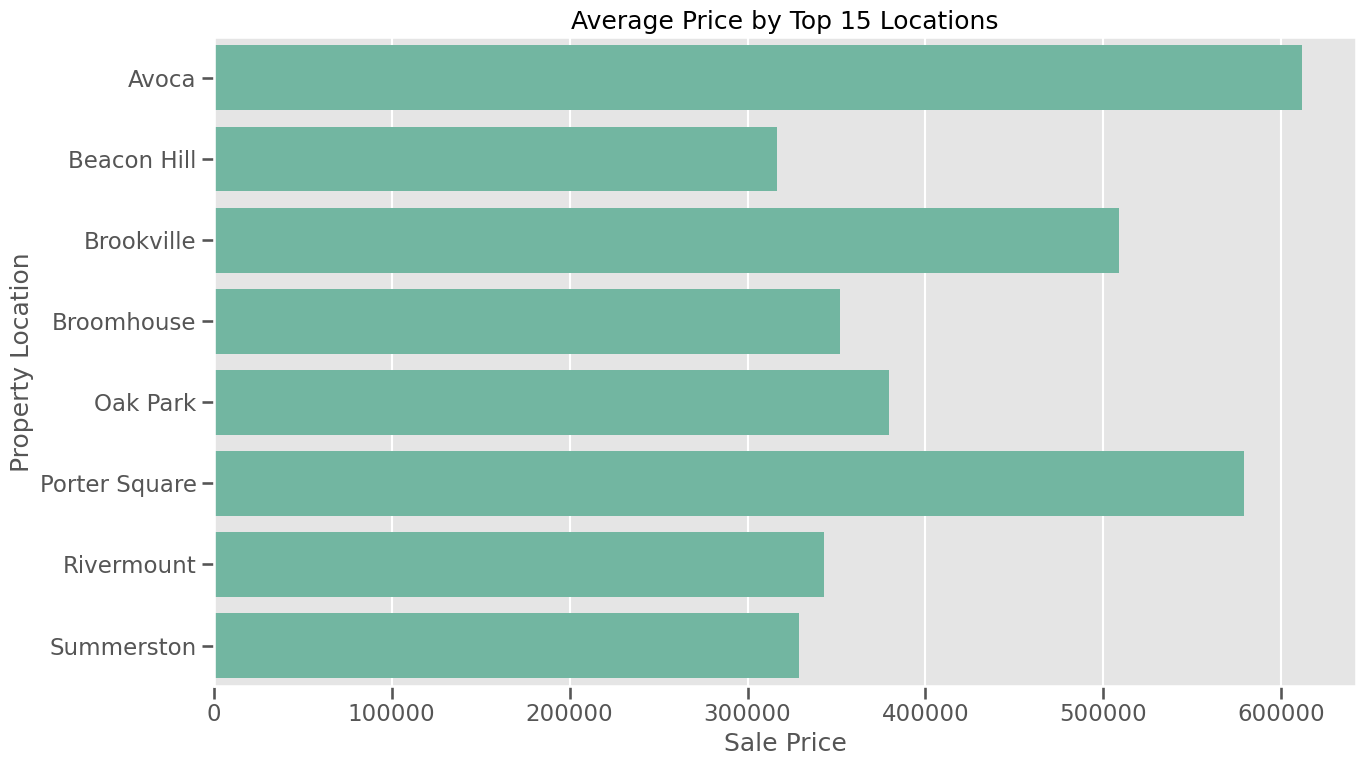

In [393]:
# Location analysis
if 'Property Location' in df.columns:
    plt.figure(figsize=(14, 8))
    location_price = df.groupby('Property Location')['Sale Price'].mean().sort_values(ascending=False).reset_index()
    top_locations = location_price.head(15)
    sns.barplot(x='Sale Price', y='Property Location', data=top_locations)
    plt.title('Average Price by Top 15 Locations')
    plt.tight_layout()

In [394]:
# Statistical tests
print("\n===== STATISTICAL ANALYSIS =====")
# ANOVA test for categorical variables impact on price
categorical_features = ['Type', 'Garden', 'Garage', 'First Time Buyer']
for feature in categorical_features:
    if feature in df.columns:
        # Skip if too many missing values
        if df[feature].isna().sum() > len(df) * 0.3:
            print(f"Skipping {feature} due to too many missing values")
            continue
            
        # Create groups for ANOVA
        groups = []
        for name, group in df.dropna(subset=[feature, 'Sale Price']).groupby(feature):
            groups.append(group['Sale Price'].values)
        
        if len(groups) >= 2:  # Need at least 2 groups for ANOVA
            f_stat, p_value = stats.f_oneway(*groups)
            print(f"ANOVA test for {feature}: F={f_stat:.4f}, p={p_value:.4f}")
            if p_value < 0.05:
                print(f"  {feature} has a statistically significant impact on price")
            else:
                print(f"  No significant impact of {feature} on price")




===== STATISTICAL ANALYSIS =====
ANOVA test for Type: F=70.9963, p=0.0000
  Type has a statistically significant impact on price
ANOVA test for Garden: F=21.6231, p=0.0000
  Garden has a statistically significant impact on price
ANOVA test for Garage: F=8.8943, p=0.0001
  Garage has a statistically significant impact on price
ANOVA test for First Time Buyer: F=9.7120, p=0.0019
  First Time Buyer has a statistically significant impact on price


/tmp/ipykernel_33410/3155261608.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.dropna(subset=[feature, 'Sale Price']).groupby(feature):


In [395]:

# Linear regression for price prediction
print("\n===== PRICE PREDICTION MODEL =====")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare data for modeling
X = df.drop(['Sale Price'], axis=1)
y = df['Sale Price']

# Identify categorical columns
cat_cols = X.select_dtypes(include=['category', 'bool', 'object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Drop non-useful columns for prediction
cols_to_drop = []
if 'Sale Date' in X.columns:
    cols_to_drop.append('Sale Date')
X = X.drop(cols_to_drop, axis=1)

# Update categorical and numerical columns
cat_cols = [col for col in cat_cols if col not in cols_to_drop]
num_cols = [col for col in num_cols if col not in cols_to_drop]

# Handle missing values
X = X.fillna({col: X[col].mode()[0] for col in cat_cols})
X = X.fillna({col: X[col].median() for col in num_cols})

try:
    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
        ])

    # Create and train model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Train model
    model.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model performance:")
    print(f"  Mean Absolute Error: ${rmse:.2f}")
    print(f"  R² Score: {r2:.4f}")
    
    if r2 >= 0.7:
        print("  Good model fit! The model explains a significant portion of price variability.")
    elif r2 >= 0.5:
        print("  Moderate model fit. The model explains some price variability but could be improved.")
    else:
        print("  Poor model fit. Consider using more features or a different model.")
except Exception as e:
    print(f"Error in model building: {e}")


===== PRICE PREDICTION MODEL =====
Model performance:
  Mean Absolute Error: $122982.79
  R² Score: 0.5684
  Moderate model fit. The model explains some price variability but could be improved.
